In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1LNjeEeHNpJwS4O9OK2gOSpwddwzHCaqW'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

file_id = '1fKnmVJYBVkLKSr6YDXwUz5tZAHDc7YvO'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

file_id = '1gNfBqguzBu8cHKMPc8C44GbvD443dNC5'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

text = "Nick likes to play football, [sepa] however he is not too fond of tennis."
text_tokens = word_tokenize(text.replace('[sepa]', ''))

import re

from collections import defaultdict
utterance_freq = defaultdict(list)
utterance_freq_Hate_7 = defaultdict(list)
utterance_freq_noHate = defaultdict(list)
utterance_freq_idk = defaultdict(list)
utterance_freq_relation = defaultdict(list)


data = pd.read_csv("7. StormfrontWS.csv")


slot_only=[]
for index, row in data.iterrows():
    remove_punc = re.sub(r'[^\w\s]','',row["sentence"])
    tokenized_word = word_tokenize(remove_punc)

    if len(tokenized_word) not in utterance_freq:
      utterance_freq.setdefault(len(tokenized_word), 0)
      utterance_freq[len(tokenized_word)] += 1
    else:
      utterance_freq[len(tokenized_word)] += 1

    if row["label"] == "noHate":
      if len(tokenized_word) not in utterance_freq_noHate:
        utterance_freq_noHate.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_noHate[len(tokenized_word)] += 1

    if row["label"] == "hate":
      if len(tokenized_word) not in utterance_freq_Hate_7:
        utterance_freq_Hate_7.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_Hate_7[len(tokenized_word)] += 1

    if row["label"] == "idk/skip":
      if len(tokenized_word) not in utterance_freq_idk:
        utterance_freq_idk.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_idk[len(tokenized_word)] += 1

    if row["label"] == "relation":
      if len(tokenized_word) not in utterance_freq_relation:
        utterance_freq_relation.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_relation[len(tokenized_word)] += 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from collections import defaultdict
utterance_freq = defaultdict(list)
utterance_freq_Hate_fox = defaultdict(list)
utterance_freq_noHate = defaultdict(list)



data = pd.read_csv("fox.csv")


for index, row in data.iterrows():
    remove_punc = re.sub(r'[^\w\s]','',row["text"])
    tokenized_word = word_tokenize(remove_punc)

    if len(tokenized_word) not in utterance_freq:
      utterance_freq.setdefault(len(tokenized_word), 0)
      utterance_freq[len(tokenized_word)] += 1
    else:
      utterance_freq[len(tokenized_word)] += 1

    if row["label"] == "non-hateful":
      if len(tokenized_word) not in utterance_freq_noHate:
        utterance_freq_noHate.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_noHate[len(tokenized_word)] += 1

    if row["label"] == "hateful":
      if len(tokenized_word) not in utterance_freq_Hate_fox:
        utterance_freq_Hate_fox.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_Hate_fox[len(tokenized_word)] += 1


In [ ]:
from collections import defaultdict
utterance_freq = defaultdict(list)
utterance_freq_Hate_twitter = defaultdict(list)
utterance_freq_noHate = defaultdict(list)
utterance_freq_none = defaultdict(list)


data = pd.read_csv("twitter.csv")


for index, row in data.iterrows():
    remove_punc = re.sub(r'[^\w\s]','',row["Text"])
    tokenized_word = word_tokenize(remove_punc)

    if len(tokenized_word) not in utterance_freq:
      utterance_freq.setdefault(len(tokenized_word), 0)
      utterance_freq[len(tokenized_word)] += 1
    else:
      utterance_freq[len(tokenized_word)] += 1

    if row["Label"] == "racism":
      if len(tokenized_word) not in utterance_freq_noHate:
        utterance_freq_noHate.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_noHate[len(tokenized_word)] += 1

    if row["Label"] == "sexism" or row["Label"] == "racism" :
      if len(tokenized_word) not in utterance_freq_Hate_twitter:
        utterance_freq_Hate_twitter.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_Hate_twitter[len(tokenized_word)] += 1

    if row["Label"] == "none":
      if len(tokenized_word) not in utterance_freq_none:
        utterance_freq_none.setdefault(len(tokenized_word), 1)
      else:
        utterance_freq_none[len(tokenized_word)] += 1


In [ ]:
!pip install kora
from kora import drive
drive.download_folder('1Y6RdkY8Uac4_bXfR4MeXhPUHaztRiLdQ')

     |████████████████████████████████| 61kB 387kB/s 
     |████████████████████████████████| 61kB 4.7MB/s 
1OZoNMcY5PJ5gbUp3stp-ibjl7BGh8PJm 45k_after_slot_annotation.csv text/csv (1/4)
Download 100%.
17_RsK0dBShqjGV-NAH4W3Nt7EbdFdep6 50K_Output.csv text/csv (2/4)
Download 100%.
1k5fFl_Ig00F9Adj7J2F9fyGqOhTKcAFF cleaned_45k.csv text/csv (3/4)
Download 100%.
10qgiWyaJHTnE_jUziapvSW4Wx3HRp4iF word_level_data_labelled0916_50k.csv text/csv (4/4)
Download 100%.


'GAME'

In [ ]:
import csv
word_list_E = defaultdict(list)
z = 0
f = csv.reader(open("GAME/cleaned_45k.csv",'r'))
a = 0
for i in f:
    if f.line_num == 1:
        continue
#    text = re.sub(r'[^\w\s]','*',i[3])
    process_text = i[4].lower().replace('[sepa]', '').split()

    z += 1
    if i[10] == "E" or i[10] == "I":
      if len(process_text) == 0:
        print(text)
        print(i,text, process_text)
      if len(process_text) not in word_list_E:
        word_list_E.setdefault(len(process_text), 1)
      else:
        word_list_E[len(process_text)] += 1


In [ ]:
def splitdic(d):
  x = []
  y = []
  factor=1.0/sum(d.values())
  a = sorted(d.items(), key=lambda x: x[0])  
  for i in a:
    x.append(i[0])
    y.append(i[1]*factor)
    
  return x, y

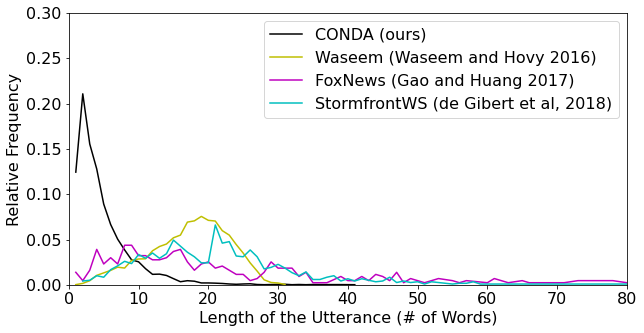

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

d ={'CONDA (ours)': word_list_E,
'Waseem (Waseem and Hovy 2016)': utterance_freq_Hate_twitter,
'FoxNews (Gao and Huang 2017)': utterance_freq_Hate_fox,
'StormfrontWS (de Gibert et al, 2018)': utterance_freq_Hate_7}

colors = list("rgbcmyk")
# plt.rcParams['figure.figsize'] = [11, 9]
for data_dict in d.values():
   x,y = splitdic(data_dict)
   plt.plot(x,y,  color=colors.pop())

fz = 16
plt.xlabel("Length of the Utterance (# of Words)", fontsize= fz)
plt.ylabel("Relative Frequency", fontsize= fz)
# plt.rcParams['figure.figsize'] = [20, 20]
plt.xticks(fontsize=fz)
plt.yticks(fontsize=fz)
plt.ylim(0,0.3)
plt.xlim(0,80)
plt.legend(d.keys(), fontsize= 16)
plt.show()